In [45]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

datadir = "../DL-Project/"


In [50]:
def load_data(i):
    #loading data
    train_data1 = np.load(datadir+f'data{i}.npy')
    train_lab1 = np.load(datadir+f'lab{i}.npy')
    data = train_data1
    labels = train_lab1

    return data, labels

data, labels = load_data(0)  
data1,labels1 = load_data(1)
data2,labels2 = load_data(2)

data = np.concatenate([data1, data2, data], axis=0)

# Combine labels

labels = np.concatenate([labels1, labels2, labels], axis=0)



data = np.expand_dims(data, axis=-1) 
maxi = -1 
for a in data[2]:
    for b in a:
        maxi = max(maxi,b)
    # pass
print(data[0],maxi)
data = data / 255.0  

X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.33, random_state=42)



[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]] [255]


In [47]:
def baseline_model():
    # model
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(data.shape[1], data.shape[2], 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='linear')  # Linear activationcombined_ for regression
    ])
    return model

In [51]:
model = baseline_model()
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])


history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)


/home/karan/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 32s 48ms/step - loss: 46.7361 - mean_squared_error: 46.7361 - val_loss: 23.3943 - val_mean_squared_error: 23.3943
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 32s 49ms/step - loss: 25.3306 - mean_squared_error: 25.3306 - val_loss: 14.9254 - val_mean_squared_error: 14.9254
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - loss: 19.3983 - mean_squared_error: 19.3983 - val_loss: 14.3153 - val_mean_squared_error: 14.3153
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 31s 47ms/step - loss: 16.5238 - mean_squared_error: 16.5238 - val_loss: 11.7877 - val_mean_squared_error: 11.7877
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 30s 45ms/step - loss: 15.2457 - mean_squared_error: 15.2457 - val_loss: 11.9515 - val_mean_squared_error: 11.9515
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - loss: 14.3253 - mean_squared_error: 14.3253 - val_loss: 14.0164 - val_mean_squared_error: 14.0164
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 30s 46ms/step - loss: 13.9890 - mean

Validation Loss: 12.0977, Validation MAE: 12.0977


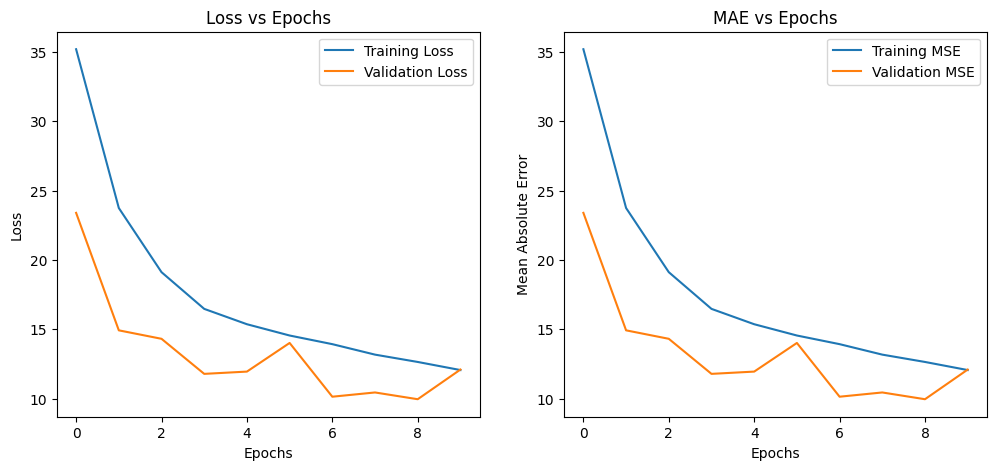

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Sum: 15.004612922668457, Actual Sum: 15


In [53]:
# losses
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {val_loss:.4f}, Validation MAE: {val_mae:.4f}")

model.save("baseline_cnn_model.h5")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_squared_error'], label='Training MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('MAE vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

example_image = X_val[3:4]  # Take a single example
predicted_sum = model.predict(example_image)
print(f"Predicted Sum: {predicted_sum[0][0]}, Actual Sum: {y_val[0]}")
